In [434]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [435]:
#This function accepts the size of the array 
# to be generated and returns an array of 
# that size, populated by uniformly distributed random integers

def generate_list(size):
    rand_list = [{"x":np.random.uniform(-100,100),"y": np.random.uniform(-100,100),"angle": -1} for i in range(size)]
    return rand_list

In [436]:
#find the point with the lowest y value
def find_lowest(List):
    i = len(List)
    cur_min = List[0]["y"]
    index=0
    for i in range (len(List)):
        if(List[i]["y"]<cur_min):
            cur_min = List[i]["y"]
            index = i
    return index

In [437]:
#find the polar angle between a given point and the base point
def find_polar_angle(x,y,base):
    angle = math.degrees(math.atan2(y-base["y"], x-base["x"]))
    if (angle<0):
        angle = angle + 360
    
    return angle

In [657]:
#this function accepts a list and sorts it based on the angle key
def sort_by_angle(List):
    return sorted(List,key = lambda x:x["angle"])
        

In [439]:
#this class sets up the stack for use in this code
class Stack:
    def __init__(self):
        self.items = []

    def is_empty(self):
        return self.items == []

    def push(self, item):
        return self.items.append(item)

    def pop(self):
        return self.items.pop()

In [440]:
#accepts size - number of total points to be generated
#this function is used in question 1 to produce the convex hull
#it returns the coordinates of the convex hull and the original unsorted list
def graham_scan(size):
    ranlist = generate_list(size)
    unsorted_list = ranlist
    min_index = find_lowest(ranlist)

    for i in range(len(ranlist)):
        ranlist[i]["angle"] = find_polar_angle(ranlist[i]["x"], ranlist[i]["y"], ranlist[min_index])
    
    ranlist = sort_by_angle(ranlist)
    
    #NOTE: the lowest point based on angle will be the base point
    stack=Stack()
    stack.push(ranlist[0])
    stack.push(ranlist[1])
    stack.push(ranlist[2])
    highest=2

    #the following block determines the convex hull!
    for i in range(2,len(ranlist)):
        while(find_polar_angle(stack.items[highest]['x'], stack.items[highest]['y'], stack.items[highest-1]) > find_polar_angle(ranlist[i]['x'], ranlist[i]['y'], stack.items[highest])):
            stack.pop()
            highest = highest-1
        stack.push(ranlist[i])
        highest = highest+1
        
    vertices = stack.items
    return vertices,unsorted_list

In [676]:
#this is question one
def question_one():
    num_hull_points = []
    num_total_points = []
    ratio = []
    
    #run graham scan for multiple amounts of total points
    for i in range (5,1000):
        num_total_points.append(i)
        num_hull_points.append(len(graham_scan(i)[0]))
        ratio.append(len(graham_scan(i)[0])/i)
        
    #plot the ratio relative to the number of total points
    plt.scatter(num_total_points, ratio, marker='.')
    title = 'Ratio of size of hull vs. number of Uniformly distributed Points'
    plt.title(title)
    plt.xlabel('Total Number of Points')
    plt.ylabel('Ratio of Hull Size to Total points')
    
    #plot hull size relative to the number of total points
    plt.scatter(num_total_points, num_hull_points, marker='.')
    title = 'Size of hull vs. number of Uniformly distributed Points'
    plt.title(title)
    plt.xlabel('Total Number of Points')
    plt.ylabel('Size of hull')
    
    
    return 
        

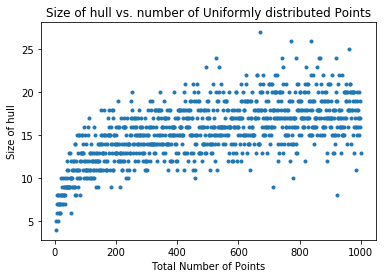

In [677]:
question_one()

In [658]:
#This function accepts the size of the array 
# to be generated and returns an array of 
# that size, populated by normally distributed random integers
def generate_listQ2(size):
    rand_list = [{"x":np.random.normal(-100,100),"y": np.random.normal(-100,100),"angle": -1} for i in range(size)]
    return rand_list

In [660]:
#this is the graham scan function as used in question one 
# with modification for question 2
#that is it simply used the normal distribution function
#rather than the uniform one

def graham_scanQ2(size):
    size = 100
    ranlist = generate_listQ2(size)
    unsorted_list = ranlist
    min_index = find_lowest(ranlist)

    for i in range(len(ranlist)):
        ranlist[i]["angle"] = find_polar_angle(ranlist[i]["x"], ranlist[i]["y"], ranlist[min_index])
    
    ranlist = sort_by_angle(ranlist)
    
    #NOTE: the lowest point based on angle will be the base point
    stack=Stack()
    stack.push(ranlist[0])
    stack.push(ranlist[1])
    stack.push(ranlist[2])
    highest=2
    
    #the following block determines the convex hull!
    for i in range(2,len(ranlist)):
        while(find_polar_angle(stack.items[highest]['x'], stack.items[highest]['y'], stack.items[highest-1]) > find_polar_angle(ranlist[i]['x'], ranlist[i]['y'], stack.items[highest])):
            stack.pop()
            highest = highest-1
        stack.push(ranlist[i])
        highest = highest+1
        
    vertices = stack.items
    return (vertices,ranlist)

In [680]:
#function for question two
def question_two():
    num_hull_points = []
    num_total_points = []
    ratio = []
    
    #run graham scan for multiple amounts of total points
    for i in range (5,1000):
        num_total_points.append(i)
        num_hull_points.append(len(graham_scanQ2(i)[0]))
        ratio.append(len(graham_scanQ2(i)[0])/i)

    #plot the ratio relative to the number of total points
    plt.scatter(num_total_points, ratio, marker='.')
    title = 'Ratio of size of hull to total Normally distributed Points'
    plt.title(title)
    plt.xlabel('Total Number of Points')
    plt.ylabel('Ratio of Hull Size to Total points')
    

    
    
    return 

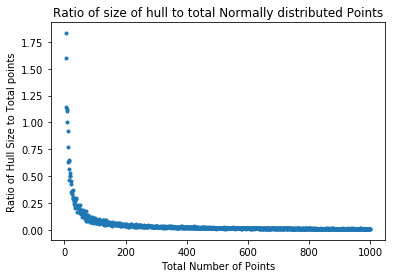

In [681]:
question_two()

In [682]:
#this function accepts the size of the list to be created 
#and where it is to be centered and generates a uniformly
#random list centered at the accepted center value
def generate_listQ3(size,center):
    rand_list = [{"x":np.random.uniform(center-100,center+100),"y": np.random.uniform(center-100,center+100),"angle": -1} for i in range(size)]
    return rand_list

In [683]:
#graham scan for question 3 
def graham_scanQ3(size,center):
    ranlist = generate_listQ3(size,center)
    unsorted_list = ranlist
    min_index = find_lowest(ranlist)

    for i in range(len(ranlist)):
        ranlist[i]["angle"] = find_polar_angle(ranlist[i]["x"], ranlist[i]["y"], ranlist[min_index])
    
    ranlist = sort_by_angle(ranlist)
    
    #the following block determines the convex hull!
    #NOTE: the lowest point based on angle will be the base point
    stack=Stack()
    stack.push(ranlist[0])
    stack.push(ranlist[1])
    stack.push(ranlist[2])
    highest=2

    for i in range(2,len(ranlist)):
        while(find_polar_angle(stack.items[highest]['x'], stack.items[highest]['y'], stack.items[highest-1]) > find_polar_angle(ranlist[i]['x'], ranlist[i]['y'], stack.items[highest])):
            stack.pop()
            highest = highest-1
        stack.push(ranlist[i])
        highest = highest+1
        
    vertices = stack.items
    return vertices,unsorted_list

In [694]:
#function for question three
def question_three():
    num_hull_points = []
    num_total_points = []
    ratio = []
    
    hull_one, rand_set_one = graham_scanQ3(100,0)
    hull_two, rand_set_two = graham_scanQ3(100,200)
    
    #the following block of code simply plots the convex hulls
 
    mid_x_one = 0
    mid_x_two = 0
    mid_y_one = 0
    mid_y_two = 0
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    for i in range(len(hull_one)):
        mid_x_one = mid_x_one + hull_one[i]["x"]
        mid_y_one = mid_y_one + hull_one[i]["y"]
        plt.scatter(hull_one[i]["x"],hull_one[i]["y"], marker='x', color = 'red')
        title = 'Size of Convex Hull with Uniformly distributed Points'
        plt.title(title)
        plt.xlabel('Total Number of Points')
        plt.ylabel('Convex Hull Size')
        
    for i in range(len(hull_two)):   
        mid_x_two = mid_x_two + hull_two[i]["x"]
        mid_y_two = mid_y_two + hull_two[i]["y"]
        plt.scatter(hull_two[i]["x"],hull_two[i]["y"], marker='x', color = 'blue')
        title = 'Size of Convex Hull with Uniformly distributed Points'
        plt.title(title)
        plt.xlabel('Total Number of Points')
        plt.ylabel('Convex Hull Size')
    
    #determining the middle of the circles
    mid_one = (mid_x_one/len(hull_one),mid_y_one/len(hull_one))
    mid_two = (mid_x_two/len(hull_two),mid_y_two/len(hull_two))
    
    #finding the largest distance from the centre
    #to a point on the hull
    
    dist_one = 0
    dist_two = 0
    for i in range(len(hull_one)):
        if(dist_one<find_dist(mid_one[0],mid_one[1],hull_one[i])):
            dist_one = find_dist(mid_one[0],mid_one[1],hull_one[i])
            
    for i in range(len(hull_two)):
        if(dist_two<find_dist(mid_two[0],mid_two[1],hull_two[i])):
            dist_two = find_dist(mid_two[0],mid_two[1],hull_two[i])

    #plot the circles
    c_1 = plt.Circle((mid_one[0], mid_one[1]), radius=dist_one, color='m', fill=False)
    c_2 = plt.Circle((mid_two[0], mid_two[1]), radius=dist_two, color='c', fill=False)
    ax.add_patch(c_1)
    ax.add_patch(c_2)
    plt.axis('scaled')
    plt.show()
    #check intersection
    if abs(dist_one + dist_two) >= math.sqrt((mid_one[0] - mid_two[0])**2 + (mid_one[1] - mid_two[1])**2):
        print('The circles intersect, this means the hulls MIGHT too!')
    else:
        print("The hulls do not intersect!")
    return 

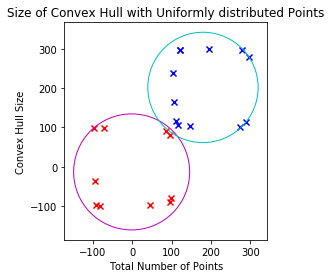

The circles intersect, this means the hulls MIGHT too!


In [695]:
question_three()

In [632]:
#find the distance between a given point and the base point
def find_dist(x,y,base):
    dist = math.sqrt((x-base["x"])**2 + (y-base["y"])**2)
    return dist